In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.optimize import curve_fit

In [2]:
df = pd.DataFrame(np.genfromtxt("data/bitcoin_data_1_year.csv", delimiter=';', dtype=None, encoding=None))
ethereum_df = pd.DataFrame(np.genfromtxt("data/ethereum_data_1_year.csv", delimiter=';', dtype=None, encoding=None))

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
1,"""2025-09-12T00:00:00.000Z""","""2025-09-12T23:59:59.999Z""","""2025-09-12T19:56:00.000Z""","""2025-09-12T12:11:00.000Z""","""2781""",115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45,2312575346970.39,"""2025-09-12T23:59:59.999Z"""
2,"""2025-09-11T00:00:00.000Z""","""2025-09-11T23:59:59.999Z""","""2025-09-11T23:58:00.000Z""","""2025-09-11T13:19:00.000Z""","""2781""",113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3,2300873652880.9,"""2025-09-11T23:59:59.999Z"""
3,"""2025-09-10T00:00:00.000Z""","""2025-09-10T23:59:59.999Z""","""2025-09-10T13:50:00.000Z""","""2025-09-10T01:52:00.000Z""","""2781""",111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11,2270015122299.65,"""2025-09-10T23:59:59.999Z"""
4,"""2025-09-09T00:00:00.000Z""","""2025-09-09T23:59:59.999Z""","""2025-09-09T07:31:00.000Z""","""2025-09-09T15:46:00.000Z""","""2781""",112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09,2221551890594.18,"""2025-09-09T23:59:59.999Z"""


In [4]:
new_headers = df.iloc[0]
df.columns = new_headers
df = df[1:]
new_headers_ethereum = ethereum_df.iloc[0]
ethereum_df.columns = new_headers
ethereum_df = ethereum_df[1:]

In [5]:
df.head(5)

,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
1,"""2025-09-12T00:00:00.000Z""","""2025-09-12T23:59:59.999Z""","""2025-09-12T19:56:00.000Z""","""2025-09-12T12:11:00.000Z""","""2781""",115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45,2312575346970.39,"""2025-09-12T23:59:59.999Z"""
2,"""2025-09-11T00:00:00.000Z""","""2025-09-11T23:59:59.999Z""","""2025-09-11T23:58:00.000Z""","""2025-09-11T13:19:00.000Z""","""2781""",113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3,2300873652880.9,"""2025-09-11T23:59:59.999Z"""
3,"""2025-09-10T00:00:00.000Z""","""2025-09-10T23:59:59.999Z""","""2025-09-10T13:50:00.000Z""","""2025-09-10T01:52:00.000Z""","""2781""",111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11,2270015122299.65,"""2025-09-10T23:59:59.999Z"""
4,"""2025-09-09T00:00:00.000Z""","""2025-09-09T23:59:59.999Z""","""2025-09-09T07:31:00.000Z""","""2025-09-09T15:46:00.000Z""","""2781""",112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09,2221551890594.18,"""2025-09-09T23:59:59.999Z"""
5,"""2025-09-08T00:00:00.000Z""","""2025-09-08T23:59:59.999Z""","""2025-09-08T15:26:00.000Z""","""2025-09-08T02:22:00.000Z""","""2781""",111163.0177975035,112869.2356980465,110630.6055984677,112071.4310885385,40212813406.78,2232377995774.42,"""2025-09-08T23:59:59.999Z"""


In [6]:
df.columns.to_list()

['\ufefftimeOpen',
 'timeClose',
 'timeHigh',
 'timeLow',
 'name',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'marketCap',
 'timestamp']

In [7]:
df.drop(['timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow'], axis=1, inplace=True)
ethereum_df.drop(['\ufefftimeOpen', 'timeClose', 'timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow', 'close'], axis=1, inplace=True)

In [8]:
ethereum_df.rename(columns={'open': 'eth_open', 'high': 'eth_high', 'low': 'eth_low', 'volume': 'eth_volume'}, inplace=True)

In [9]:
df['timeClose'] = df['timeClose'].str.replace('"', '')
df['timeClose'] = df['timeClose'].str.replace('T23:59:59.999Z', '')
df['timeClose'] = df['timeClose'].str.replace('-', '')


In [10]:
df["timeClose"] = pd.to_datetime(df["timeClose"])
df["timeClose"] = (df["timeClose"] - df["timeClose"].iloc[-1])

In [11]:
df

,timeClose,open,high,low,close,volume
1,363 days,115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45
2,362 days,113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3
3,361 days,111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11
4,360 days,112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09
5,359 days,111163.0177975035,112869.2356980465,110630.6055984677,112071.4310885385,40212813406.78
...,...,...,...,...,...,...
360,4 days,60309.0018795135,61664.0673338615,59218.2524421004,61649.6787266514,40990702890.6
361,3 days,58192.5093438557,61316.0913839546,57628.0717661941,60308.5375947655,38075570117.66
362,2 days,59185.22685956,59205.5103578251,57501.3391727673,58192.5068714421,32032822113.39
363,1 days,60000.7283175086,60381.9166672998,58696.3094180022,59182.8353338828,18120960866.97


In [12]:
int(df['timeClose'].iloc[0].days)

363

In [13]:
df["timeClose"] = df["timeClose"].dt.days.astype(int)
df["close"] = (df["close"].astype(float))
df["open"] = (df["open"].astype(float))
df["high"] = (df["high"].astype(float))
df["low"] = (df["low"].astype(float))
df["volume"] = (df["volume"].astype(float))
ethereum_df["eth_open"] = (ethereum_df["eth_open"].astype(float))
ethereum_df["eth_high"] = (ethereum_df["eth_high"].astype(float))
ethereum_df["eth_low"] = (ethereum_df["eth_low"].astype(float))
ethereum_df["eth_volume"] = (ethereum_df["eth_volume"].astype(float))

In [14]:
df

,timeClose,open,high,low,close,volume
1,363,115507.792956,116769.382525,114794.484351,116101.580896,5.478573e+10
2,362,113961.428094,115522.543870,113453.839309,115507.537527,4.568507e+10
3,361,111531.247880,114275.252781,110940.076863,113955.358955,5.637747e+10
4,360,112077.577274,113225.440041,110776.700308,111530.549982,4.598448e+10
5,359,111163.017798,112869.235698,110630.605598,112071.431089,4.021281e+10
...,...,...,...,...,...,...
360,4,60309.001880,61664.067334,59218.252442,61649.678727,4.099070e+10
361,3,58192.509344,61316.091384,57628.071766,60308.537595,3.807557e+10
362,2,59185.226860,59205.510358,57501.339173,58192.506871,3.203282e+10
363,1,60000.728318,60381.916667,58696.309418,59182.835334,1.812096e+10


In [15]:
ethereum_df

,eth_open,eth_high,eth_low,eth_volume
1,4589.505690,4620.792821,4443.264748,3.035262e+10
2,4592.442761,4643.972430,4556.270131,3.349726e+10
3,4503.635681,4617.234691,4429.644497,4.412090e+10
4,4526.078199,4537.599678,4428.330126,3.276150e+10
5,4609.723012,4670.530051,4469.861437,4.022406e+10
...,...,...,...,...
360,2654.361584,2672.461794,2557.724345,1.411973e+10
361,2648.482226,2671.275856,2593.152174,1.665881e+10
362,2582.774825,2701.677791,2541.910293,1.991284e+10
363,2615.848101,2632.039336,2528.522196,1.318066e+10


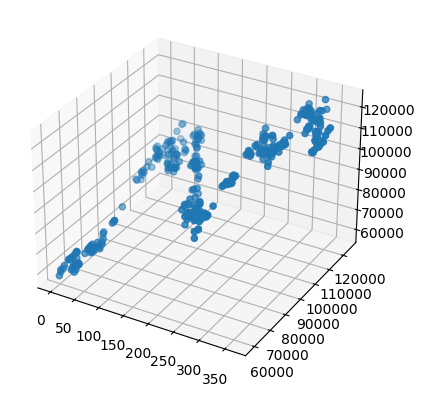

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = df['timeClose']
ys = df['high']
zs = df['close']
ax.scatter(xs, ys, zs)
plt.show()

In [17]:
X_sing = df['timeClose'].values.reshape(-1, 1)
X_multi = pd.concat([df[['timeClose', 'open', 'high', 'low', 'volume']], ethereum_df[['eth_open', 'eth_high', 'eth_low', 'eth_volume']]], axis=1)
y = df['close'].values.reshape(-1, 1)

In [18]:
X_train_sing, X_test_sing, y_train_sing, y_test_sing = train_test_split(X_sing, y, test_size=0.2)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2)

In [19]:
degree = 7
polyreg_sing = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
polyreg_sing.fit(X_train_sing, y_train_sing)

line_of_best_fit = LinearRegression()
line_of_best_fit.fit(X_sing, y)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_predicted_sing = polyreg_sing.predict(X_test_sing)
r2_sing = r2_score(y_test_sing, y_predicted_sing)
y_predicted_multi = model_multi.predict(X_test_multi)
r2_multi = r2_score(y_test_multi, y_predicted_multi)
print(r2_sing)
print(r2_multi)

0.917753153278196
0.9971375156223901


In [21]:
print(y_predicted_multi[10])
print(y_test_multi[10])

[118215.11957496]
[118368.00324918]


In [22]:
print(f"Cross validation for multivariable regression: {str(cross_val_score(model_multi, X_test_multi, y_test_multi, cv=10).mean())}")
print(f"MSE for multivariable regression: {str(mean_squared_error(y_test_multi, y_predicted_multi))}")
print(f"MAPE for multivariable regression: {str(round(mean_absolute_percentage_error(y_test_multi, y_predicted_multi) * 100, 5))}% \n")
print("Cross validation for polynomial regression: " + str(cross_val_score(polyreg_sing, X_test_sing, y_test_sing, cv=10).mean()))
print("MSE for polynomial regression: " + str(mean_squared_error(y_test_sing, y_predicted_sing)))
print(f"MAPE for polynomial regression: {str(round(mean_absolute_percentage_error(y_test_sing, y_predicted_sing) * 100, 5))}% \n")

Cross validation for multivariable regression: 0.993987209179274
MSE for multivariable regression: 719510.4670851538
MAPE for multivariable regression: 0.6421% 

Cross validation for polynomial regression: 0.8864619828950484
MSE for polynomial regression: 22866110.131075248
MAPE for polynomial regression: 4.2759% 



In [23]:
y_predicted = polyreg_sing.predict(X_sing)
y_pred = line_of_best_fit.predict(X_sing)

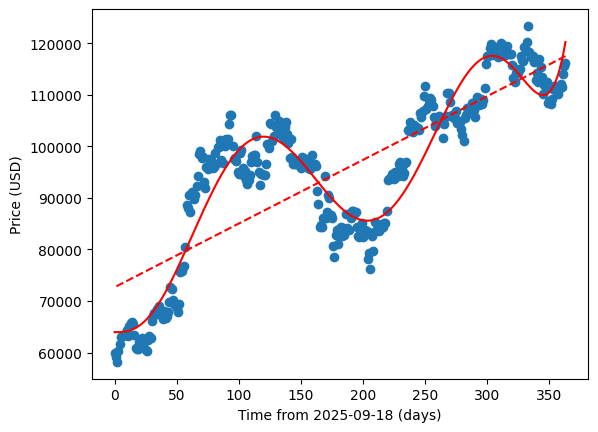

In [24]:
plt.scatter(X_sing, y)
plt.plot(X_sing, y_predicted, color='red', label='Line of Best Fit')
plt.plot(X_sing, y_pred, color='red', label='Line of Best Fit', linestyle='--')
plt.xlabel("Time from 2025-09-18 (days)")
plt.ylabel("Price (USD)")
plt.show()

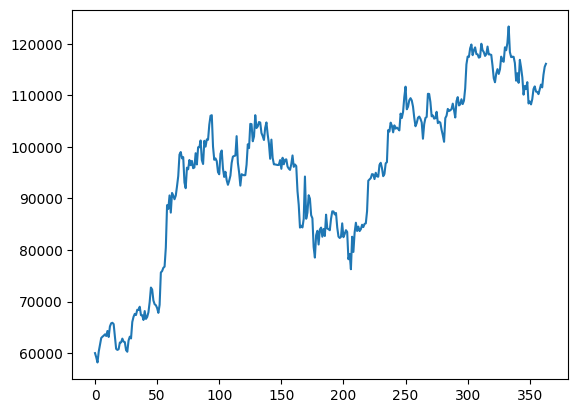

In [25]:
y = y[::-1]
plt.plot(y)

In [26]:
result = adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

NameError: name 'adfuller' is not defined

In [ ]:
y_1d = np.ravel(y)
diff_1 = np.diff(y_1d)
result = adfuller(diff_1)
print(f'ADF p-value after 1st difference: {result[1]:.4f}')

ADF p-value after 1st difference: 0.0000


In [ ]:
train_size = 200
train = y_1d[:train_size]
test = y_1d[train_size:]

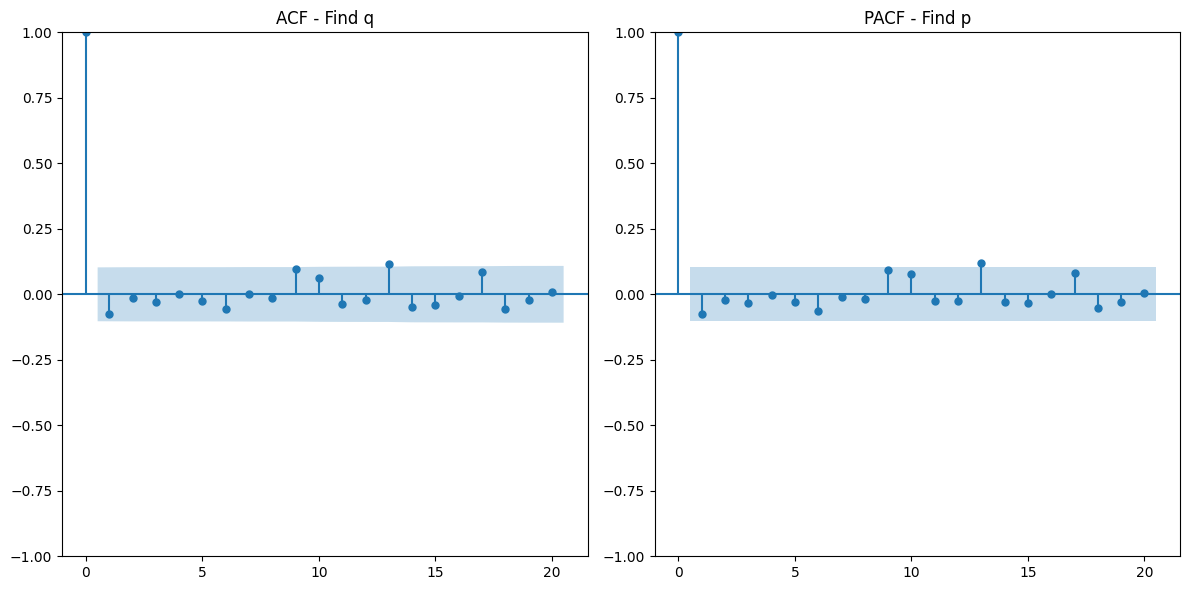

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(diff_1, lags=20, ax=plt.gca())
plt.title('ACF - Find q')

plt.subplot(1, 2, 2)
plot_pacf(diff_1, lags=20, ax=plt.gca())
plt.title('PACF - Find p')

plt.tight_layout()
plt.show()

In [ ]:
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

In [ ]:
forecast_steps = len(test)
forecast = fitted_model.forecast(steps=forecast_steps)
confidence_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
print(f"\n--- Model Performance on Test Set ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


--- Model Performance on Test Set ---
RMSE: 23563.63
MAE: 21414.06
MSE: 555244659.04


NameError: name 'train_data' is not defined

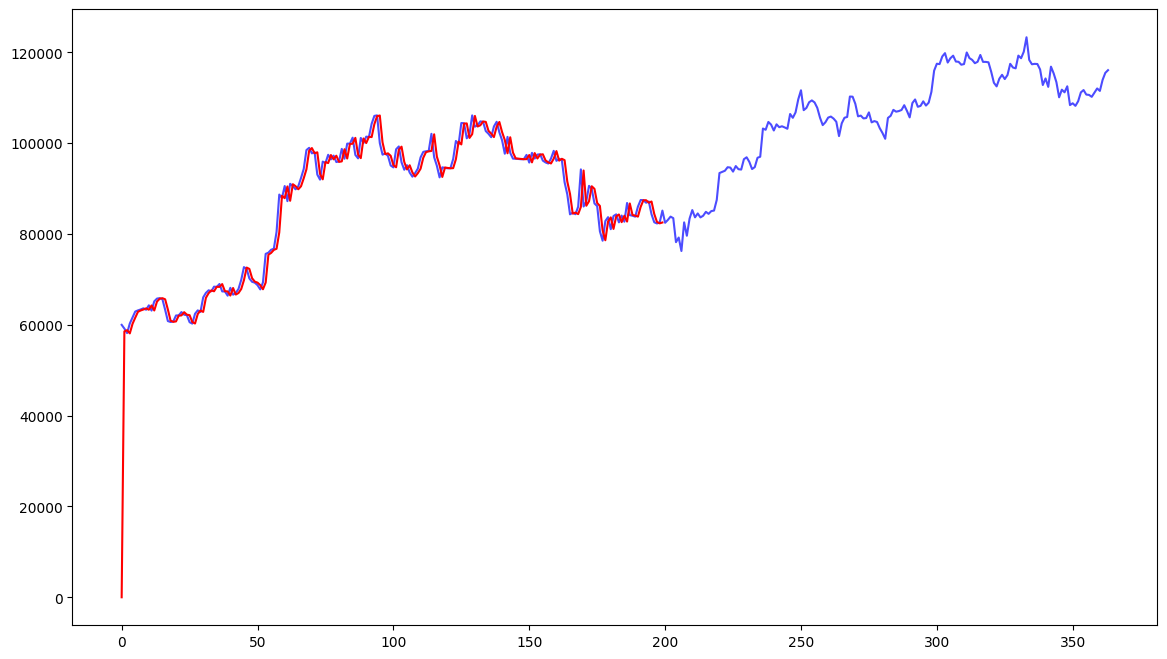

In [ ]:
plt.figure(figsize=(14, 8))

# Plot original data
plt.plot(y_1d, label='Original Data', alpha=0.7, color='blue')

# Plot fitted values (in-sample predictions on training data)
plt.plot(fitted_model.fittedvalues, label='Fitted Values (Training)', color='red')

# Plot predicted values (out-of-sample forecasts on test data)
test_start_idx = len(train_data)  # This should be 200
test_indices = range(test_start_idx, test_start_idx + len(forecast))

plt.plot(test_indices, forecast, label='Predicted Values (Test)', color='green', linestyle='--')

# Add vertical line to separate train and test
plt.axvline(x=test_start_idx-1, color='gray', linestyle=':', alpha=0.7, label='Train/Test Split')

plt.title('ARIMA(1,1,1) - Original vs Fitted vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
y_1d = y.ravel()
x = X_sing.ravel()

Training data: 200 points
Testing data: 164 points
Initial parameter guesses: [np.float64(23976.8780676461), 0.12566370614359174, 0, np.float64(125.82025216506547), np.float64(60005.1191557571)]

=== FITTED PARAMETERS ===
Amplitude (a): -2074.4443
Frequency: 0.1398
Phase: -3.9618
Slope (b): -151.2331
Intercept (c): 126169.4673
Period: 44.96 time units

=== MODEL PERFORMANCE ===
Training RMSE: 11152.9362
Testing RMSE: 10433.9238
Training R²: 0.3864
Testing R²: 0.0865


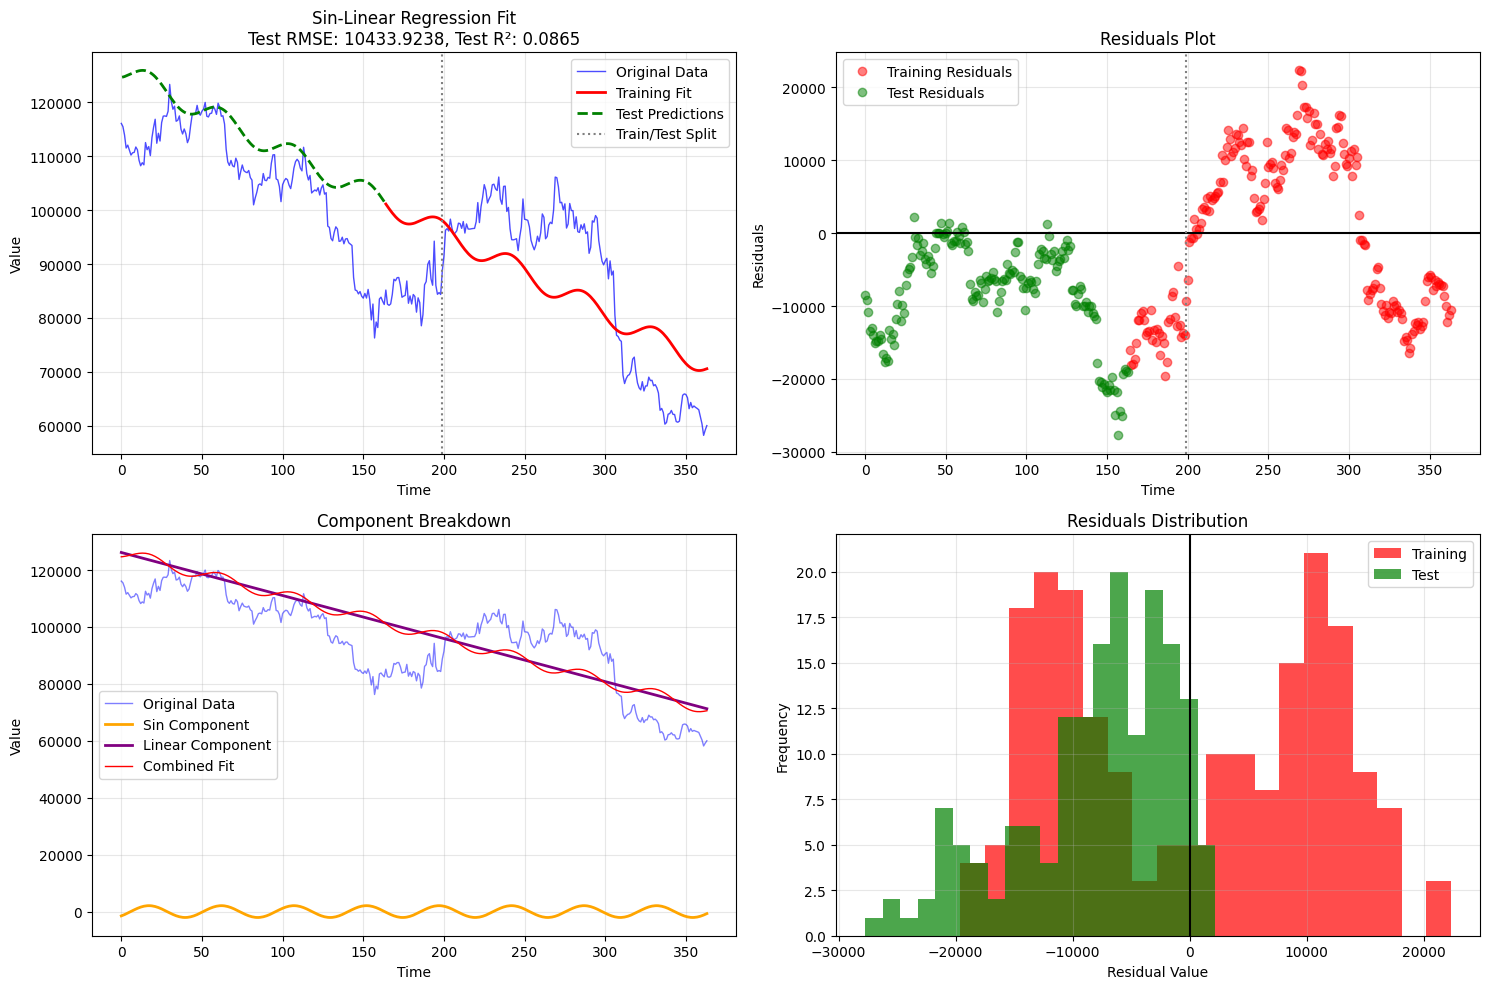


=== FUTURE PREDICTIONS ===


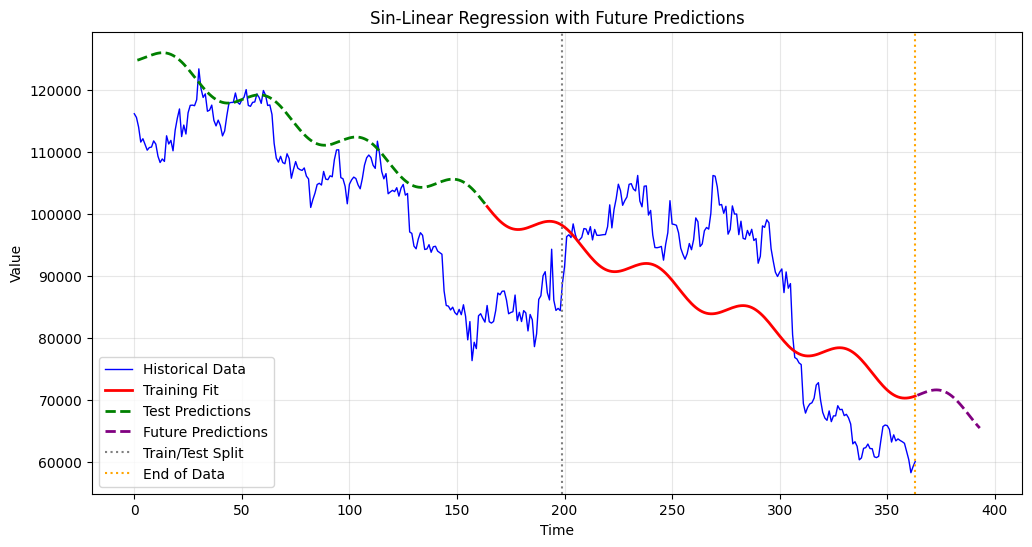

Next 5 future predictions: [70685.09098423 70820.65424707 70959.11798826 71094.83245631
 71222.20151689]


In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Define the function: a*sin(frequency*x + phase) + b*x + c
def sin_linear_func(x, a, frequency, phase, b, c):
    return a * np.sin(frequency * x + phase) + b * x + c

# Split into train and test
train_size = 200
x_train = x[:train_size]
y_train = y_1d[:train_size]
x_test = x[train_size:]
y_test = y_1d[train_size:]

print(f"Training data: {len(x_train)} points")
print(f"Testing data: {len(x_test)} points")

# Step 1: Make initial parameter guesses
# Look at your data to make reasonable initial guesses
amplitude_guess = (np.max(y_train) - np.min(y_train)) / 2
frequency_guess = 2 * np.pi / (len(y_train) / 4)  # Guess 4 cycles in training data
phase_guess = 0
slope_guess = (y_train[-1] - y_train[0]) / len(y_train)
intercept_guess = y_train[0]

initial_guess = [amplitude_guess, frequency_guess, phase_guess, slope_guess, intercept_guess]
print(f"Initial parameter guesses: {initial_guess}")

# Step 2: Fit the model
try:
    # Fit the model to training data
    params, covariance = curve_fit(sin_linear_func, x_train, y_train, p0=initial_guess, maxfev=5000)
    
    # Extract fitted parameters
    a_fit, freq_fit, phase_fit, b_fit, c_fit = params
    
    print("\n=== FITTED PARAMETERS ===")
    print(f"Amplitude (a): {a_fit:.4f}")
    print(f"Frequency: {freq_fit:.4f}")
    print(f"Phase: {phase_fit:.4f}")
    print(f"Slope (b): {b_fit:.4f}")
    print(f"Intercept (c): {c_fit:.4f}")
    print(f"Period: {2*np.pi/freq_fit:.2f} time units")
    
    # Step 3: Generate predictions
    y_train_pred = sin_linear_func(x_train, *params)
    y_test_pred = sin_linear_func(x_test, *params)
    y_full_pred = sin_linear_func(x, *params)
    
    # Step 4: Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print("\n=== MODEL PERFORMANCE ===")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")
    
    # Step 5: Plot the results
    plt.figure(figsize=(15, 10))
    
    # Main plot
    plt.subplot(2, 2, 1)
    plt.plot(x, y_1d, 'b-', label='Original Data', alpha=0.7, linewidth=1)
    plt.plot(x_train, y_train_pred, 'r-', label='Training Fit', linewidth=2)
    plt.plot(x_test, y_test_pred, 'g--', label='Test Predictions', linewidth=2)
    plt.axvline(x=train_size-1, color='gray', linestyle=':', label='Train/Test Split')
    plt.title(f'Sin-Linear Regression Fit\nTest RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Residuals plot
    plt.subplot(2, 2, 2)
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    plt.plot(x_train, residuals_train, 'ro', alpha=0.5, label='Training Residuals')
    plt.plot(x_test, residuals_test, 'go', alpha=0.5, label='Test Residuals')
    plt.axhline(y=0, color='black', linestyle='-')
    plt.axvline(x=train_size-1, color='gray', linestyle=':')
    plt.title('Residuals Plot')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Component breakdown
    plt.subplot(2, 2, 3)
    sin_component = a_fit * np.sin(freq_fit * x + phase_fit)
    linear_component = b_fit * x + c_fit
    plt.plot(x, y_1d, 'b-', label='Original Data', alpha=0.5, linewidth=1)
    plt.plot(x, sin_component, 'orange', label='Sin Component', linewidth=2)
    plt.plot(x, linear_component, 'purple', label='Linear Component', linewidth=2)
    plt.plot(x, y_full_pred, 'r-', label='Combined Fit', linewidth=1)
    plt.title('Component Breakdown')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Distribution of residuals
    plt.subplot(2, 2, 4)
    plt.hist(residuals_train, bins=20, alpha=0.7, label='Training', color='red')
    plt.hist(residuals_test, bins=20, alpha=0.7, label='Test', color='green')
    plt.axvline(x=0, color='black', linestyle='-')
    plt.title('Residuals Distribution')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Step 6: Future predictions
    print("\n=== FUTURE PREDICTIONS ===")
    future_steps = 30
    x_future = np.arange(len(y_1d), len(y_1d) + future_steps)
    y_future_pred = sin_linear_func(x_future, *params)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y_1d, 'b-', label='Historical Data', linewidth=1)
    plt.plot(x_train, y_train_pred, 'r-', label='Training Fit', linewidth=2)
    plt.plot(x_test, y_test_pred, 'g--', label='Test Predictions', linewidth=2)
    plt.plot(x_future, y_future_pred, 'purple', linestyle='--', label='Future Predictions', linewidth=2)
    plt.axvline(x=train_size-1, color='gray', linestyle=':', label='Train/Test Split')
    plt.axvline(x=len(y_1d)-1, color='orange', linestyle=':', label='End of Data')
    plt.title('Sin-Linear Regression with Future Predictions')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Next 5 future predictions: {y_future_pred[:5]}")
    
except Exception as e:
    print(f"Error in fitting: {e}")
    print("\nTrying alternative approach with bounded parameters...")
    
    # Alternative: Use bounds to help the optimization
    try:
        bounds = (
            [0, 0, -2*np.pi, -np.inf, -np.inf],  # lower bounds
            [np.inf, 2*np.pi, 2*np.pi, np.inf, np.inf]   # upper bounds
        )
        
        params, covariance = curve_fit(sin_linear_func, x_train, y_train, 
                                      p0=initial_guess, bounds=bounds, maxfev=5000)
        
        a_fit, freq_fit, phase_fit, b_fit, c_fit = params
        
        print("\n=== FITTED PARAMETERS (with bounds) ===")
        print(f"Amplitude (a): {a_fit:.4f}")
        print(f"Frequency: {freq_fit:.4f}")
        print(f"Phase: {phase_fit:.4f}")
        print(f"Slope (b): {b_fit:.4f}")
        print(f"Intercept (c): {c_fit:.4f}")
        
        # Generate predictions and plot (same as above)
        y_train_pred = sin_linear_func(x_train, *params)
        y_test_pred = sin_linear_func(x_test, *params)
        
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)
        
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        
    except Exception as e2:
        print(f"Alternative approach also failed: {e2}")

In [ ]:
x_flat = X_sing.ravel()
y_flat = y.ravel()

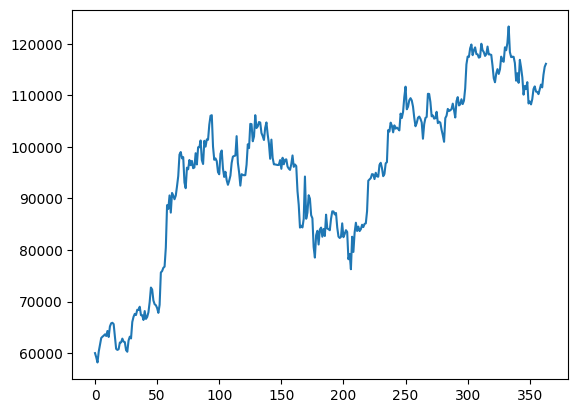

In [ ]:
plt.plot(y_flat)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_test = adfuller(y_flat)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.877017
p-value: 0.342949


In [ ]:
data_diff = np.diff(y_flat)
result = adfuller(data_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -20.46702313837072
p-value: 0.0


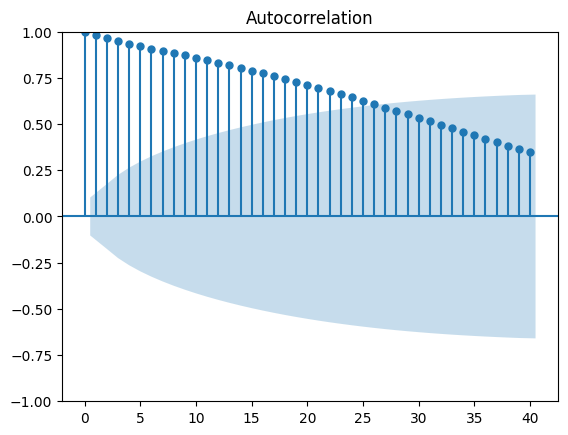

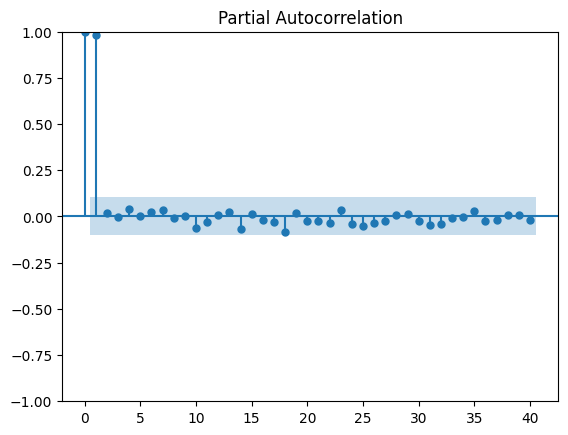

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y_flat, lags=40)
plot_pacf(y_flat, lags=40)
plt.show()

In [ ]:
train_size = int(len(y_flat) * 0.8)
train, test = train_test_split(y_flat, train_size=train_size/len(df), shuffle=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(30, 1, 20))
model_fit = model.fit()

print(model_fit.summary())

/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  291
Model:               ARIMA(30, 1, 20)   Log Likelihood               -2621.071
Date:                Sat, 01 Nov 2025   AIC                           5344.141
Time:                        16:38:58   BIC                           5531.305
Sample:                             0   HQIC                          5419.128
                                - 291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0813      0.436      0.187      0.852      -0.773       0.936
ar.L2          0.0556      0.488      0.114      0.909      -0.900       1.011
ar.L3          0.0415      0.360      0.115      0.9

In [ ]:
test_forecast = model_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean)

In [ ]:
mse = mean_squared_error(test, test_forecast_series)
rmse = mse**0.5
mape = mean_absolute_percentage_error(test, test_forecast_series)
print(rmse)
print(mape)

9683.154689125255
0.07616172412750963


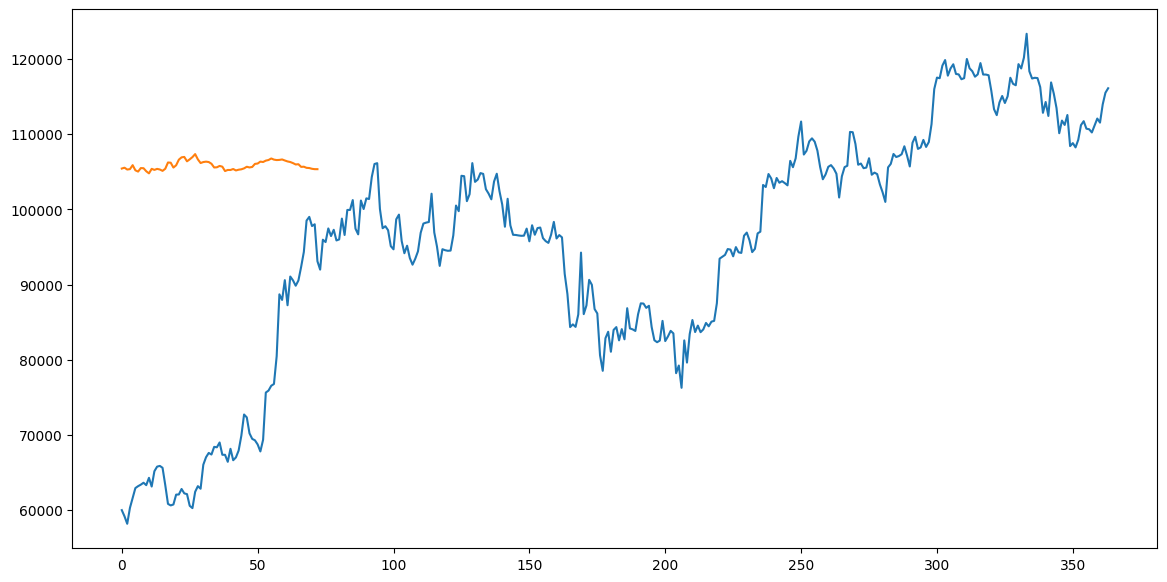

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(y_flat, label='Training Data')
plt.plot(test_forecast_series, label='forecast')

In [ ]:
test_forecast_series

0     105425.211052
1     105537.542268
2     105293.523815
3     105347.349634
4     105875.528250
          ...      
68    105519.774733
69    105492.562591
70    105391.441210
71    105342.518991
72    105340.272324
Length: 73, dtype: float64